In [1]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Experiment 1

In [2]:
def predator_yields(populations, predation_rates):
    if sum(populations) == 0:
        return populations
    chance_of_being_eaten = [population * predation_rate for (population, predation_rate) in 
                             zip(populations, predation_rates)]
    chance_of_being_eaten = [chance / sum(chance_of_being_eaten) for chance in chance_of_being_eaten]
    # Technically allows for one prey to be eaten twice. This is fine.
    prey_eaten = np.random.choice(prey_species_count, predator_count, replace=True, p=chance_of_being_eaten)
    yield_counts = [list(prey_eaten).count(prey) for prey in range(prey_species_count)]
    return yield_counts

def discrete_generation_no_carrying_capacity(reproduction_rate, population_at_t, yield_count):
    return max(0, int(reproduction_rate * (population_at_t - yield_count)))

def process_carrying_capacity(list_of_populations):
    total = sum(list_of_populations)
    if total > prey_limit:
        return [int(population * (prey_limit / total)) for population in list_of_populations]
    else:
        return list_of_populations

In [3]:
def simulate():
    global prey_limit, predator_count, starting_populations, predation_rates, reproductive_rates
    global num_generations, has_carrying_capacity, prey_species_count
    
    assert prey_species_count == len(starting_populations) == len(predation_rates) == len(reproductive_rates)
    prey_names = ['Prey ' + str(i) for i in range(prey_species_count)]
    population_df = pd.DataFrame(columns=['Generation'] + prey_names)
    population_df = population_df.set_index('Generation')
    populations = starting_populations
    population_df.loc[0] = populations

    for generation in np.arange(1, 1+num_generations):
        yield_counts = predator_yields(populations, predation_rates)
        populations = [discrete_generation_no_carrying_capacity(reproductive_rate, population, yield_count) 
                       for (reproductive_rate, population, yield_count) in 
                       zip(reproductive_rates, populations, yield_counts)]
        if has_carrying_capacity:
            populations = process_carrying_capacity(populations)
        population_df.loc[generation] = populations
        
    return population_df

,Prey 0,Prey 1,Prey 2,Prey 3
Generation,,,,
0,20,20,20,20
1,23,22,21,15
2,23,21,22,16
3,24,24,21,14
4,25,21,23,15


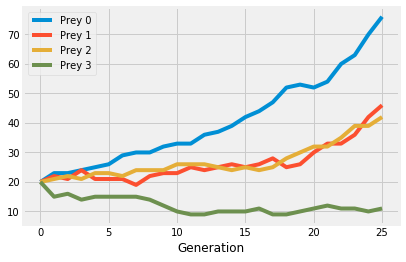

In [33]:
prey_limit = 100
predator_count = 10
starting_populations = [20, 20, 20, 20]
predation_rates = [6, 7, 8, 9] # Relative chance of each prey type getting eaten (per predator)
reproductive_rates = [1.17, 1.17, 1.17, 1.17]
num_generations = 25
has_carrying_capacity = False
prey_species_count = len(starting_populations)

population_df = simulate()
population_df.plot()
population_df.head()

# Experiment 2

,Prey 0,Prey 1,Prey 2,Prey 3
Generation,,,,
0,20,20,20,20
1,22,21,20,19
2,25,21,21,17
3,26,22,22,15
4,29,21,24,14


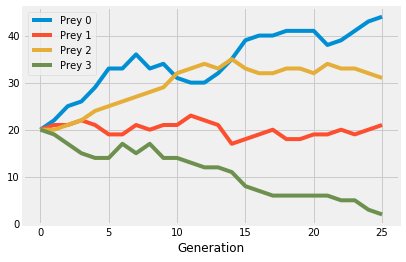

In [32]:
prey_limit = 100
predator_count = 10
starting_populations = [20, 20, 20, 20]
predation_rates = [6, 7, 8, 9] # Relative chance of each prey type getting eaten (per predator)
reproductive_rates = [1.17, 1.2, 1.2, 1.23]
num_generations = 25
has_carrying_capacity = True
prey_species_count = len(starting_populations)

population_df = simulate()
population_df.plot()
population_df.head()